In [133]:
# importing required libraries.
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_percentage_error,mean_squared_error, r2_score


import warnings
warnings.filterwarnings("ignore")

# Here, the Exploratory Data analysis for a Superstore which is being operated in US and it's work allover the US.

## For this analysis we're going to predict the profit made by the store on the basis of various data available in the dataset.
## so our label column will be "Profit"

# Data loading and stats

In [134]:
store_df = pd.read_csv("Superstore.csv", encoding='latin-1')

In [135]:
store_df

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,...,Postal_Code,Region,Product_ID,Category,Sub_Category,Product_Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11-08-2016,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11-08-2016,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,06-12-2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10-11-2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10-11-2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,1/21/2014,1/23/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2017-121258,2/26/2017,03-03-2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2017-121258,2/26/2017,03-03-2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2017-121258,2/26/2017,03-03-2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


In [136]:
store_df.shape

(9994, 21)

In [137]:
store_df.columns

Index(['Row_ID', 'Order_ID', 'Order_Date', 'Ship_Date', 'Ship_Mode',
       'Customer_ID', 'Customer_Name', 'Segment', 'Country', 'City', 'State',
       'Postal_Code', 'Region', 'Product_ID', 'Category', 'Sub_Category',
       'Product_Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [138]:
store_df.isnull().sum()

Row_ID           0
Order_ID         0
Order_Date       0
Ship_Date        0
Ship_Mode        0
Customer_ID      0
Customer_Name    0
Segment          0
Country          0
City             0
State            0
Postal_Code      0
Region           0
Product_ID       0
Category         0
Sub_Category     0
Product_Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [285]:
store_df['Profit'] = store_df['Profit'].replace(0, 0.1)  # Replace with a value of 1

In [286]:
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row_ID         9994 non-null   int64         
 1   Order_ID       9994 non-null   object        
 2   Order_Date     9994 non-null   datetime64[ns]
 3   Ship_Date      9994 non-null   datetime64[ns]
 4   Ship_Mode      9994 non-null   object        
 5   Customer_ID    9994 non-null   object        
 6   Customer_Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal_Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product_ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub_Category   9994 n

In [287]:
store_df.describe()

,Row_ID,Order_Date,Ship_Date,Postal_Code,Sales,Quantity,Discount,Profit,ship_time,order_year
count,9994.000000,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,2016-04-30 00:07:12.259355648,2016-05-03 23:06:58.571142912,55190.379428,229.858001,3.789574,0.156203,28.657547,3.958175,2015.722233
min,1.000000,2014-01-03 00:00:00,2014-01-07 00:00:00,1040.000000,0.444000,1.000000,0.000000,-6599.978000,0.000000,2014.000000
25%,2499.250000,2015-05-23 00:00:00,2015-05-27 00:00:00,23223.000000,17.280000,2.000000,0.000000,1.728750,3.000000,2015.000000
50%,4997.500000,2016-06-26 00:00:00,2016-06-29 00:00:00,56430.500000,54.490000,3.000000,0.200000,8.666500,4.000000,2016.000000
75%,7495.750000,2017-05-14 00:00:00,2017-05-18 00:00:00,90008.000000,209.940000,5.000000,0.200000,29.364000,5.000000,2017.000000
max,9994.000000,2017-12-30 00:00:00,2018-01-05 00:00:00,99301.000000,22638.480000,14.000000,0.800000,8399.976000,7.000000,2017.000000
std,2885.163629,NaN,NaN,32063.693350,623.245101,2.225110,0.206452,234.260028,1.747567,1.123555


# These are some hypothesis written over here..

In [ ]:

# impact of region on profit.
# hypothesis statement: different regions can impact the profit variably.
# analysis: compare the average and total profit across all available regions and notice the regions associated with profit makign or loss making scenario.


# impact of state on profit.
# hypothesis statement: same as the region, different states also can impact the profit variably.
# analysis: compare the average and total profit across all available regions and identify that which states are leading profit and which are leading losses


# impact of customer_segment on profit.
# hypothesis statement: customers from different segments can affect the profittability.
# analysis: plot a chart and obeserve the profits across variious segments.


# impact of category on profit. 
# hypothesis statement: products from various category can make effect on the profit making.
# analysis: check that how much % of total profit is given by which category, it can conclude over ouut statement.


# impact of Quantity on profit.
# hypothesis statement: number of items in order also can affect the profitability.
# analysis: observe that how much profit is generated ehan particular number of items are ordered.


# impact of ship_mode on profit.
# hypothesis statement: various ship mode also impacts the profitability because they may have different maintaining charges.
# analysis: have a look at the plotting of the profit across various shipping modes.

# and more..



In [141]:
#  In this case the statistics for postal_code dose not make helpful outcomes.

### changing the formats of various dates so they can be used in date related calculations.

In [288]:
def parse_date(date_str):
    formats = ['%m-%d-%Y', '%d-%m-%Y', '%m/%d/%Y', '%d/%m/%Y']  # any number of formats can be added
    for f in formats:
        try:
            return pd.to_datetime(date_str, format=f)
        except ValueError:
            continue
    return pd.NaT  


store_df["Order_Date"] = store_df["Order_Date"].apply(parse_date)
store_df["Ship_Date"] = store_df["Ship_Date"].apply(parse_date)

In [143]:
# store_df["Order_Date"] = pd.to_datetime(store_df["Order_Date"], infer_datetime_format=True, dayfirst=True)
# store_df["Ship_Date"] = pd.to_datetime(store_df["Ship_Date"], infer_datetime_format=True, dayfirst=True) # error coerce is used to ignore fixed order rule. it will take any of dd-mm-yyyy or mm-dd-yyyy in a same way.


In [289]:
store_df['ship_time'] = store_df["Ship_Date"] - store_df["Order_Date"]
store_df['ship_time'] = store_df['ship_time'].dt.days

In [145]:
print(store_df.ship_time)


0       3
1       3
2       4
3       7
4       7
       ..
9989    2
9990    5
9991    5
9992    5
9993    5
Name: ship_time, Length: 9994, dtype: int64


## fetching the months and years from the date to check how any perticular month or year is effective for sales or profit

In [290]:
store_df['order_month'] = pd.to_datetime(store_df['Order_Date']).dt.month_name()
store_df['order_year'] = pd.to_datetime(store_df['Order_Date']).dt.year

In [291]:
# just verifying for null values after adding new columns.

store_df.isnull().sum()

Row_ID           0
Order_ID         0
Order_Date       0
Ship_Date        0
Ship_Mode        0
Customer_ID      0
Customer_Name    0
Segment          0
Country          0
City             0
State            0
Postal_Code      0
Region           0
Product_ID       0
Category         0
Sub_Category     0
Product_Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
ship_time        0
order_month      0
order_year       0
dtype: int64

## what are the amount of the sales and profit in a perticular month all over the time.??

In [292]:
monthly_sales = store_df.groupby("order_month")["Sales"].sum().reset_index().sort_values(by='Sales',ascending=False)

# monthly_sales_profit = store_df.groupby("order_month").agg({"Sales": "sum", "Profit": "sum"}).reset_index()
monthly_sales
# .sort_values(by='Sales',ascending=False)

,order_month,Sales
9,November,352461.0710
2,December,325293.5035
11,September,307649.9457
7,March,205005.4888
10,October,200322.9847
1,August,159044.0630
8,May,155028.8117
6,June,152718.6793
5,July,147238.0970
0,April,137762.1286


## what is the amount of the sales for a particular month.??

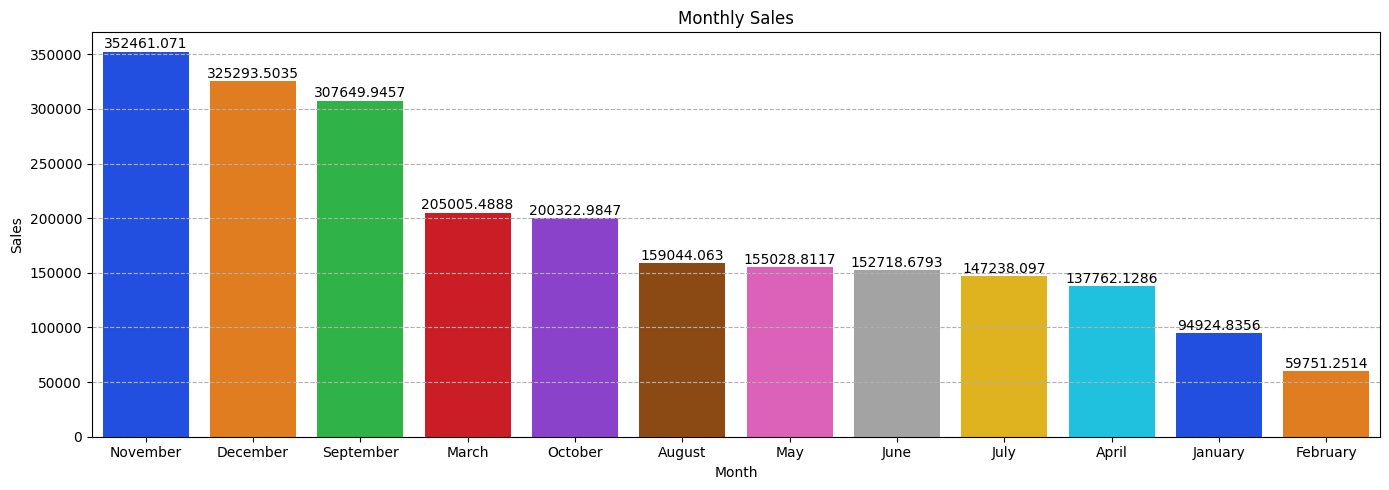

In [293]:
plt.figure(figsize=(14, 5))
plt.title("Monthly Sales")

sns.barplot(data=monthly_sales, x="order_month", y="Sales", hue="order_month", palette="bright")

# plt.xticks(rotation=45)
for index, value in enumerate(monthly_sales["Sales"]):
    plt.text(index, value + 200, str(value), ha='center', va='bottom')

plt.xlabel("Month")
plt.ylabel("Sales")
plt.grid(axis='y', linestyle='--', alpha=1)  
plt.tight_layout()
plt.show()

# Observe the total amount of the profit in any perticular month..?

### here we can see that the months at the end f the year are making higher profits. So, we can say that the some particular months are helpful to making the profit.

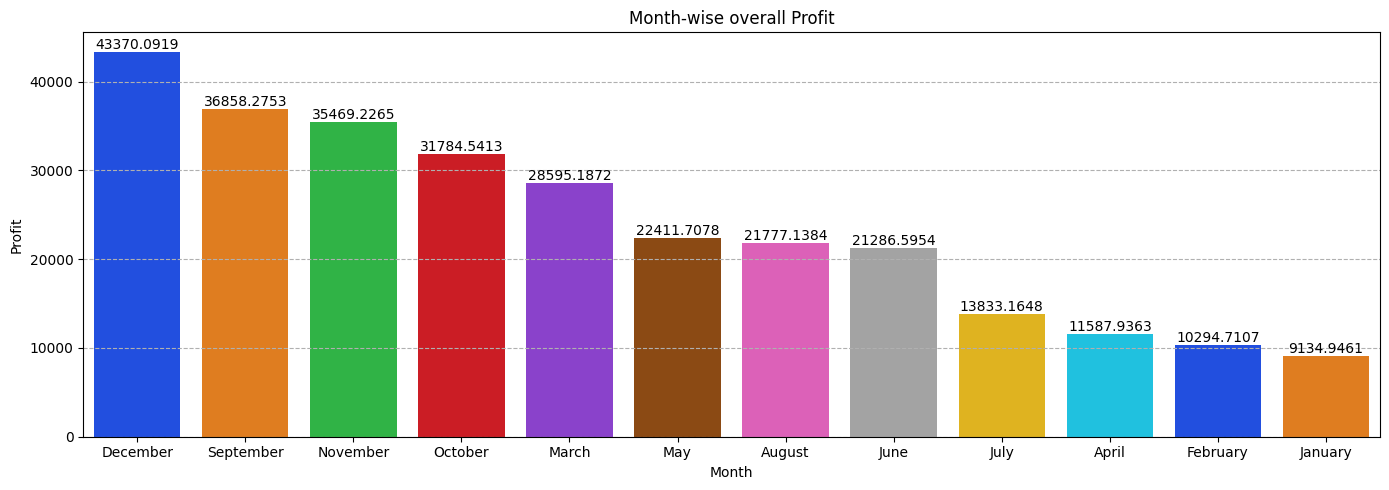

In [294]:
monthly_profit = store_df.groupby("order_month")["Profit"].sum().reset_index().sort_values(by='Profit',ascending=False)

plt.figure(figsize=(14, 5))
plt.title("Month-wise overall Profit")

sns.barplot(data=monthly_profit, x="order_month", y="Profit", hue="order_month", palette="bright")

# plt.xticks(rotation=45)
for index, value in enumerate(monthly_profit["Profit"]):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.xlabel("Month")
plt.ylabel("Profit")
plt.grid(axis='y', linestyle='--', alpha=1)  
plt.tight_layout()
plt.show()

## Observe the average amount of the profit in any perticular month..??

### for average profit the scenario is different as compered to the total profit. that means that the highest profit making month is not on the top to make average profit.

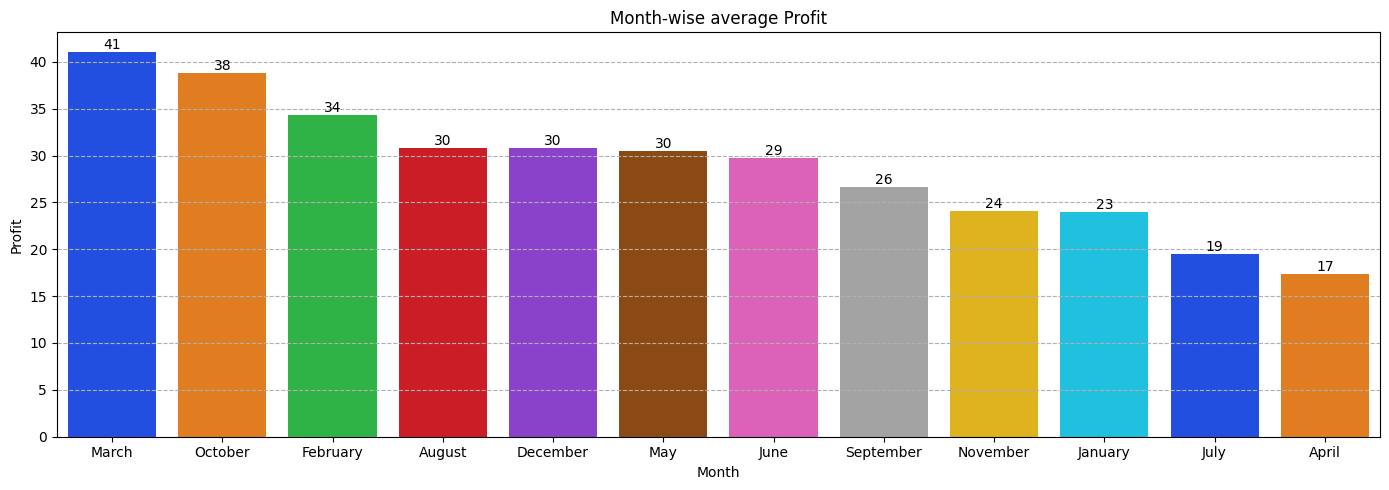

In [295]:
monthly_profit = store_df.groupby("order_month")["Profit"].mean().reset_index().sort_values(by='Profit',ascending=False)

plt.figure(figsize=(14, 5))
plt.title("Month-wise average Profit")

sns.barplot(data=monthly_profit, x="order_month", y="Profit", hue="order_month", palette="bright")

# plt.xticks(rotation=45)
for index, value in enumerate(monthly_profit["Profit"]):
    plt.text(index, value, int(value), ha='center', va='bottom')

plt.xlabel("Month")
plt.ylabel("Profit")
plt.grid(axis='y', linestyle='--', alpha=1)  
plt.tight_layout()
plt.show()

# What is the role of Category column in generation of the Sales..??

### here we can see that all of 3 categories performs approximately same for the profit..

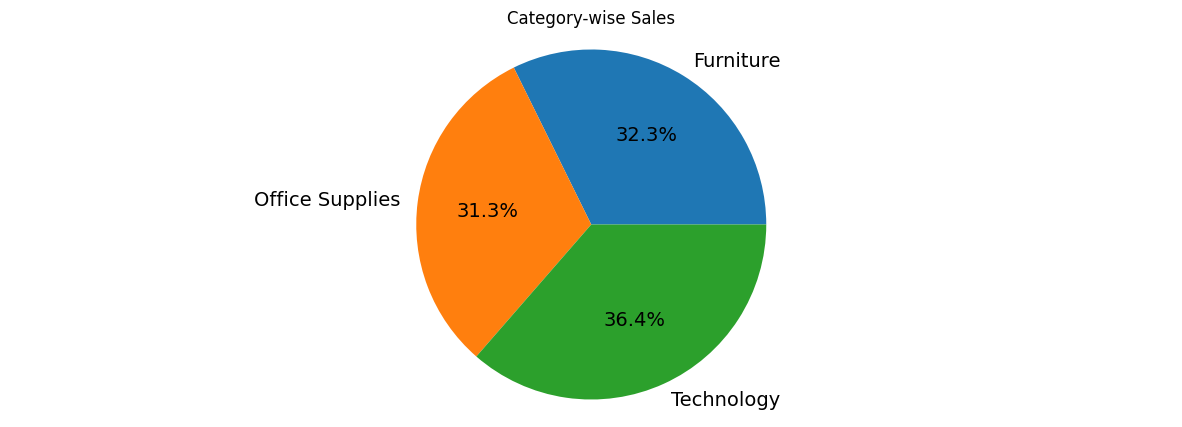

In [152]:
category_sales = store_df.groupby("Category")["Sales"].sum()

# Plot the pie chart
plt.figure(figsize=(15,5))
plt.pie(category_sales, labels=category_sales.index, autopct='%1.1f%%' , textprops={'fontsize': 14})
plt.title("Category-wise Sales")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# What is the contribution of the categories to profit making.??
### here in side the pie chart we can see that the office supplies and technology plays a major role for profit making. So, it will play a significant role in model for the profit prediction.

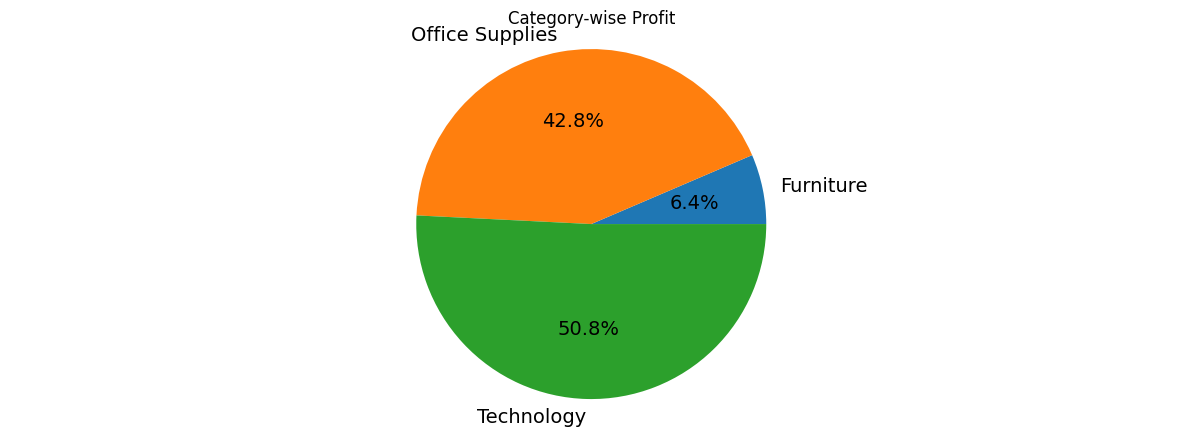

In [296]:
category_profit = store_df.groupby("Category")["Profit"].sum()
# category_profit = store_df.groupby("Category")["Profit"].mean()

# Plot the pie chart
plt.figure(figsize=(15,5))
plt.pie(category_profit, labels=category_profit.index, autopct='%1.1f%%' , textprops={'fontsize': 14})
plt.title("Category-wise Profit")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# What is the contribution of the sub-categories to profit making...??
### here bar chart is showing that which category giving how much profit..??
### we can see that some sum-categories are loss-making also. So, we can say that sub-category of the product somehow affects the profit.

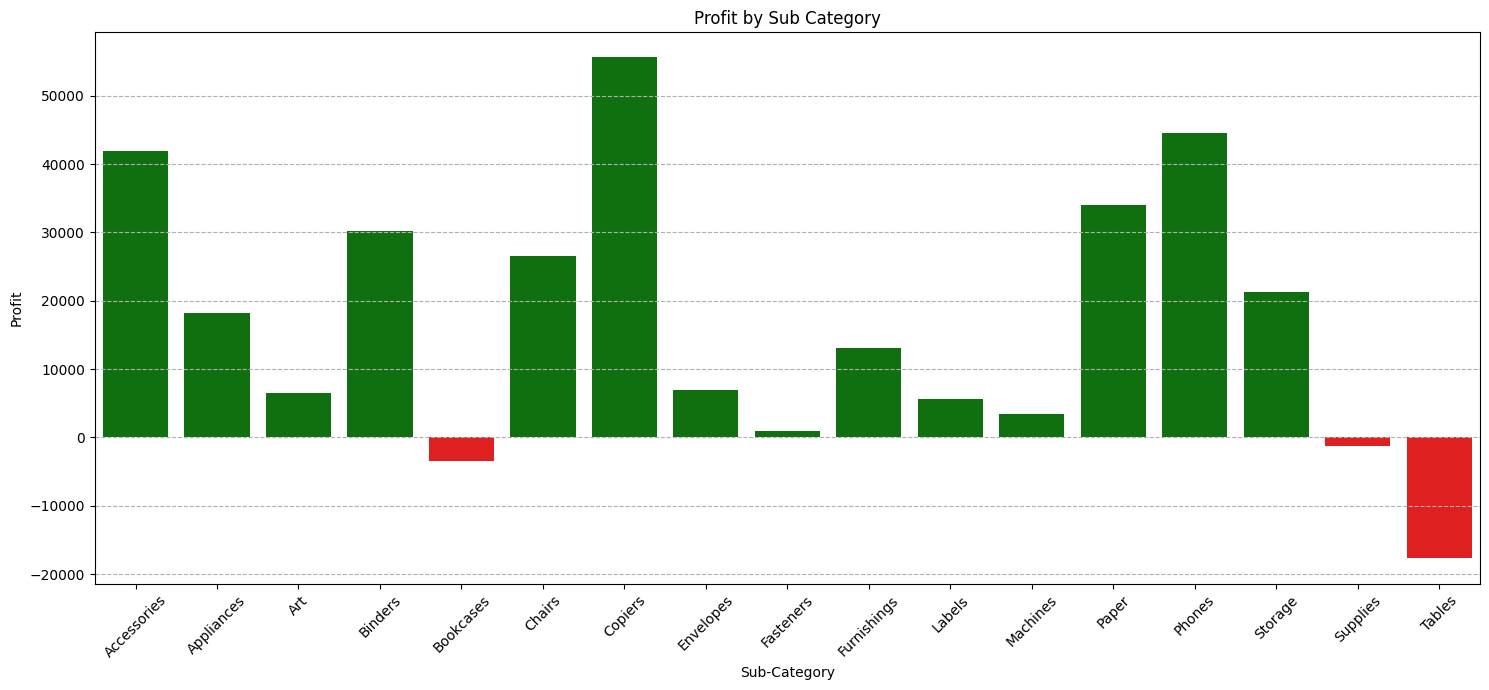

In [297]:
plt.figure(figsize=(15,7))


sub_category_profit = store_df.groupby('Sub_Category')["Profit"].sum().reset_index()
colors = ['red' if val < 0 else 'green' for val in sub_category_profit['Profit']]

plt.title("Profit by Sub Category")
sns.barplot(sub_category_profit, x = 'Sub_Category', y='Profit', hue='Sub_Category', palette = colors)

plt.xlabel("Sub-Category")
plt.ylabel("Profit")
plt.xticks(rotation=45)

plt.grid(axis='y', linestyle='--', alpha=1)  
plt.tight_layout()
plt.show()



## What is the contribution of the regions to profit making..??

### here in side the pie chart we can see that the office supplies and technology plays a major role for profit making..
### so it will play a significant role in model for the profit prediction.

Region
Central    17.093182
East       32.136475
South      28.858475
West       33.849719
Name: Profit, dtype: float64


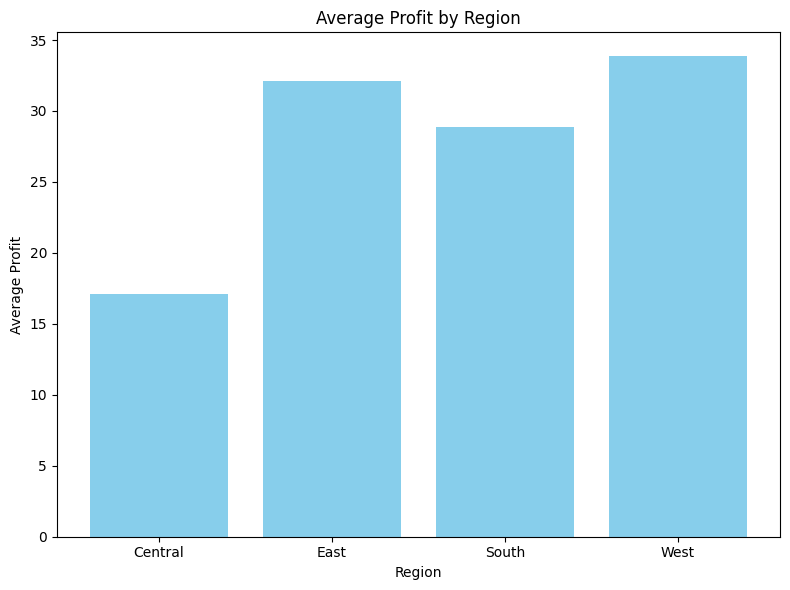

In [299]:
average_profit_by_region = store_df.groupby("Region")["Profit"].mean()
print(average_profit_by_region)

plt.figure(figsize=(8, 6))
plt.bar(average_profit_by_region.index, average_profit_by_region, color='skyblue')

plt.title("Average Profit by Region")
plt.xlabel("Region")
plt.ylabel("Average Profit")
# plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# What is the role of states in profit generation..??

### here from the chart below we can see that that the profit is disributed very differently... some states are highly profit making and some states are highly loss making as well... so state can affect the prefiction of the profit.

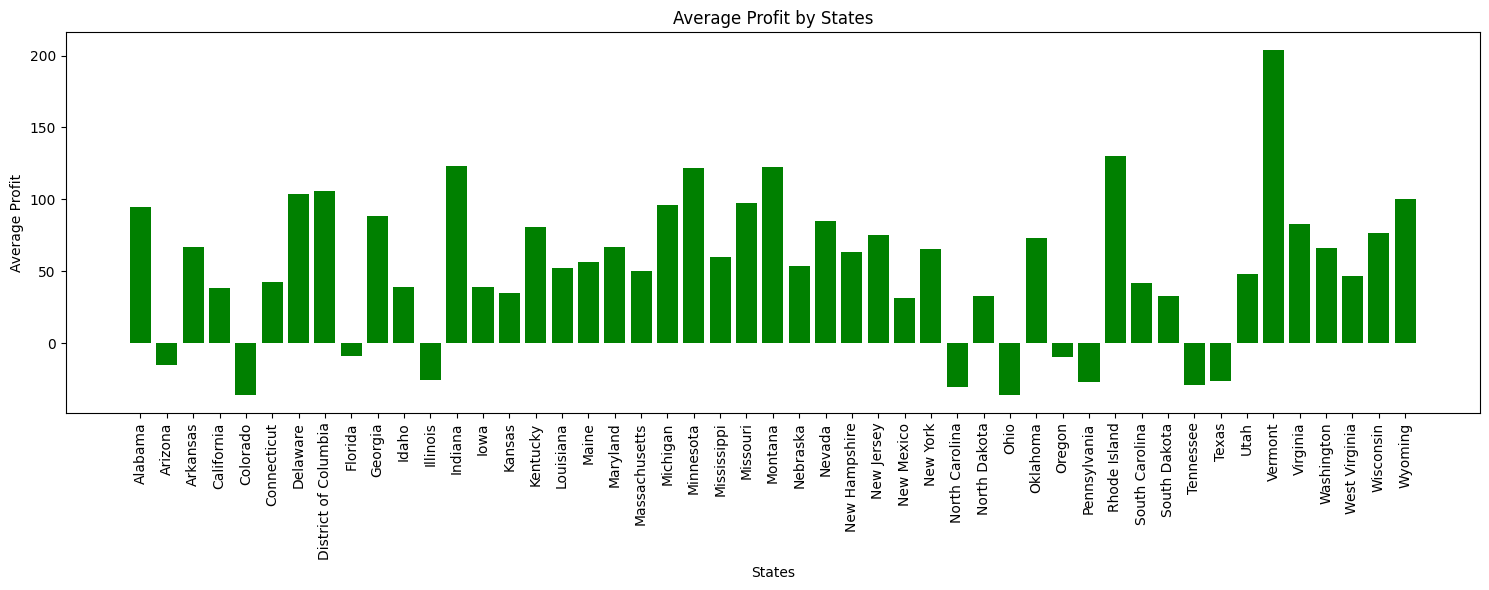

In [300]:
average_profit_by_state = store_df.groupby("State")["Profit"].mean()
# print(average_profit_by_state)

plt.figure(figsize=(15, 6))
plt.bar(average_profit_by_state.index, average_profit_by_state, color='Green')

plt.title("Average Profit by States")
plt.xlabel("States")
plt.ylabel("Average Profit")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### cheking for outliers in Shiping time

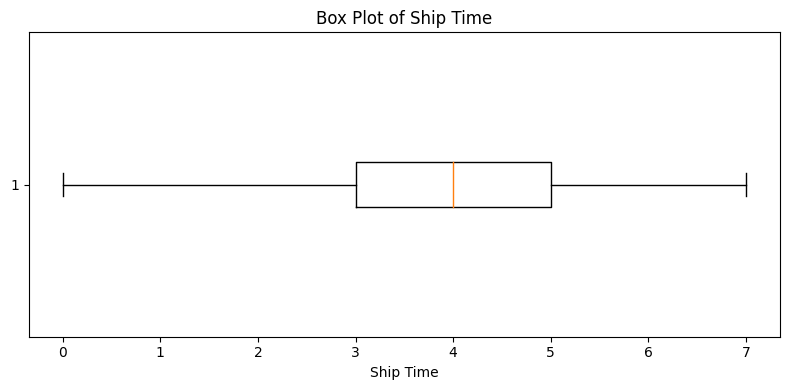

In [157]:
plt.figure(figsize=(8, 4))
plt.boxplot(store_df["ship_time"], vert=False)  # vert=False for horizontal box plot
plt.title("Box Plot of Ship Time")
plt.xlabel("Ship Time")
plt.tight_layout()
plt.show()

## Checking for outliers on Sales using box-plot chart

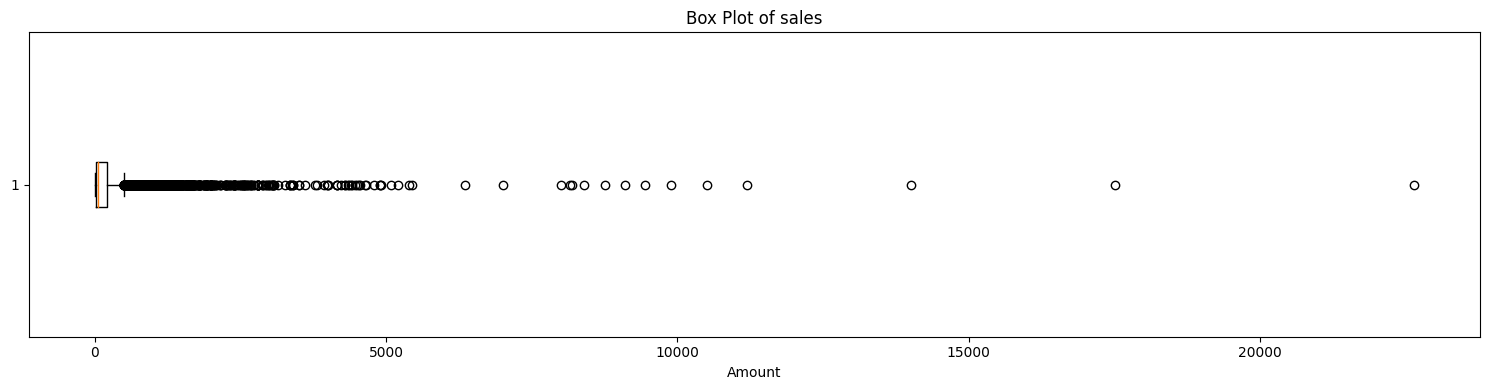

In [301]:
plt.figure(figsize=(15, 4))
plt.boxplot(store_df["Sales"], vert=False)  # vert=False for horizontal box plot
plt.title("Box Plot of sales")
plt.xlabel("Amount")
plt.tight_layout()
plt.show()

## Checking for outliers on Discount using box-plot chart

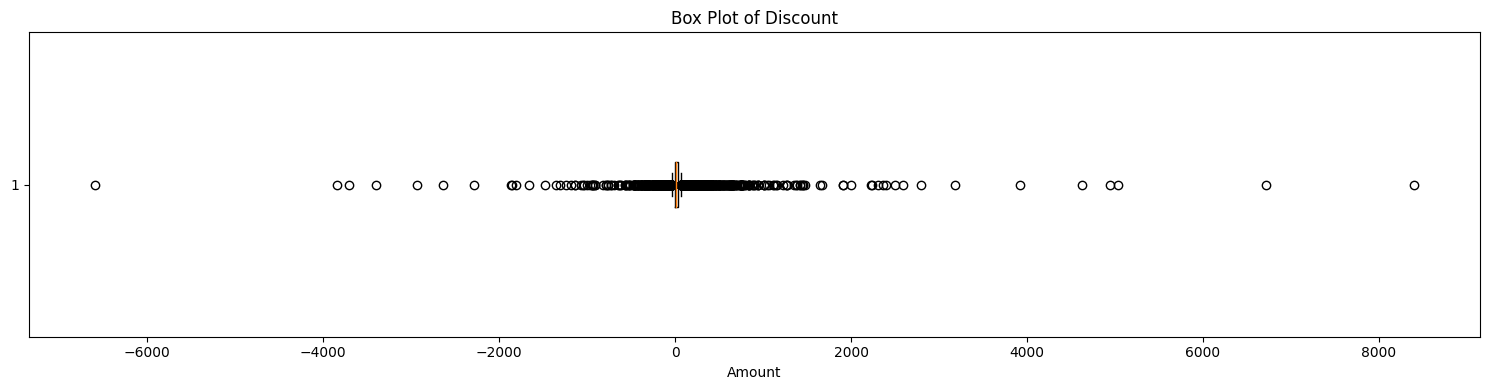

In [302]:
plt.figure(figsize=(15, 4))
plt.boxplot(store_df["Profit"], vert=False)  # vert=False for horizontal box plot
plt.title("Box Plot of Discount")
plt.xlabel("Amount")
plt.tight_layout()
plt.show()

### average time per shipping mode.

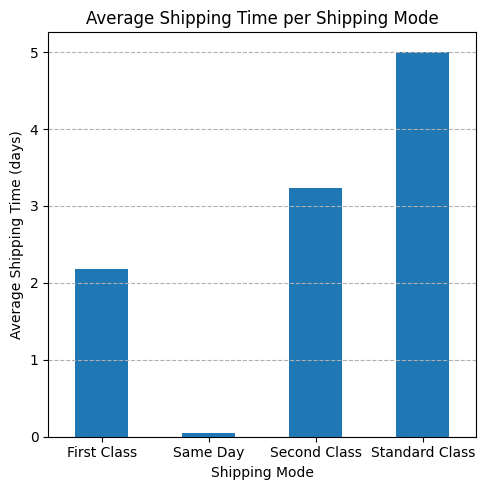

In [160]:
avg_shipping_time_per_mode = store_df.groupby('Ship_Mode')['ship_time'].mean()

# Plot the bar chart
plt.figure(figsize=(5, 5))
avg_shipping_time_per_mode.plot(kind='bar')
plt.title('Average Shipping Time per Shipping Mode')
plt.xlabel('Shipping Mode')
plt.ylabel('Average Shipping Time (days)')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=1)
plt.tight_layout()
plt.show()

# What is the Anual profit per year..??

### Here average profit per year is neargy for all of the years... we can't notice any significant change in profit year-wise. So, we can say that year may not affect the profit that much.

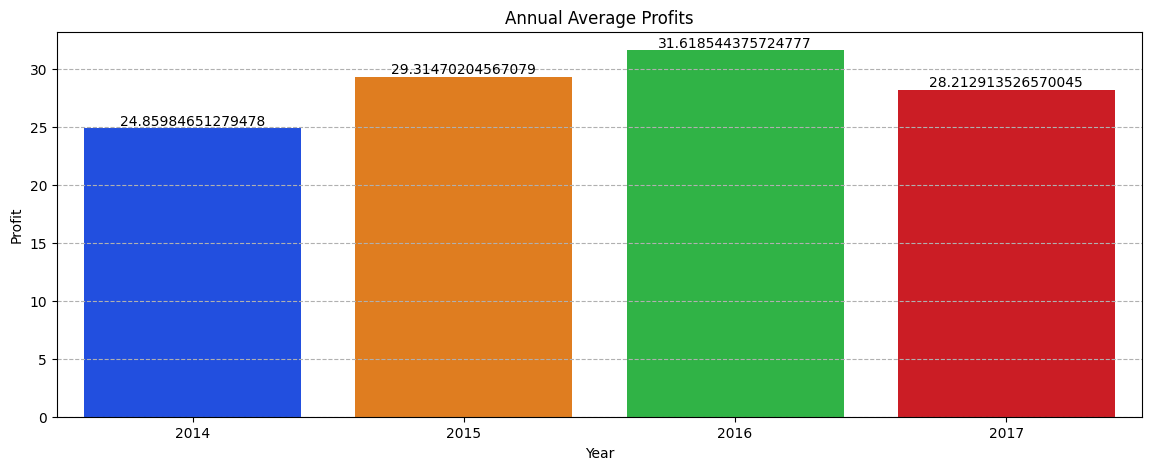

In [303]:
annual_profit = store_df.groupby("order_year")["Profit"].mean().reset_index()
plt.figure(figsize=(14, 5))
plt.title("Annual Average Profits")
sns.barplot(annual_profit,x = "order_year",y = "Profit", palette="bright")


for index, value in enumerate(annual_profit["Profit"]):
    plt.text(index, value , str(value), ha='center', va='bottom')

plt.xlabel("Year")
plt.ylabel("Profit")

plt.grid(axis='y', linestyle='--', alpha=1) 
# plt.legend()
# plt.tight_layout()
plt.show()

# What is Average profit per ship-mode....??

### Here average profit per ship-mode is also nearly common for all type of modes...there's no heavy changes in profit for any shipping mode.So, we can say that ship-mode may not affect the profit that much.

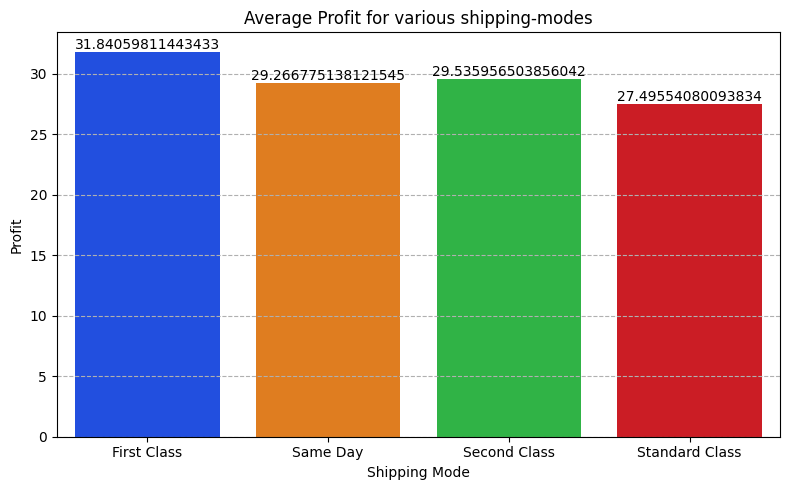

In [304]:
modewise_profit = store_df.groupby("Ship_Mode")["Profit"].mean().reset_index()
plt.figure(figsize=(8, 5))
plt.title("Average Profit for various shipping-modes")
sns.barplot(modewise_profit, x = "Ship_Mode",y = "Profit", hue='Ship_Mode', palette="bright")


for index, value in enumerate(modewise_profit["Profit"]):
    plt.text(index, value , str(value), ha='center', va='bottom')

plt.xlabel("Shipping Mode")
plt.ylabel("Profit")

plt.grid(axis='y', linestyle='--', alpha=1)  
plt.tight_layout()
plt.show()

# Does the Quantity make any effect on the profit..??

### Here's a graph showing quantity-wise profit... relation between profit and order quantity is visible thru the chart. So, we can say that quanity column can be used to predict the profit..

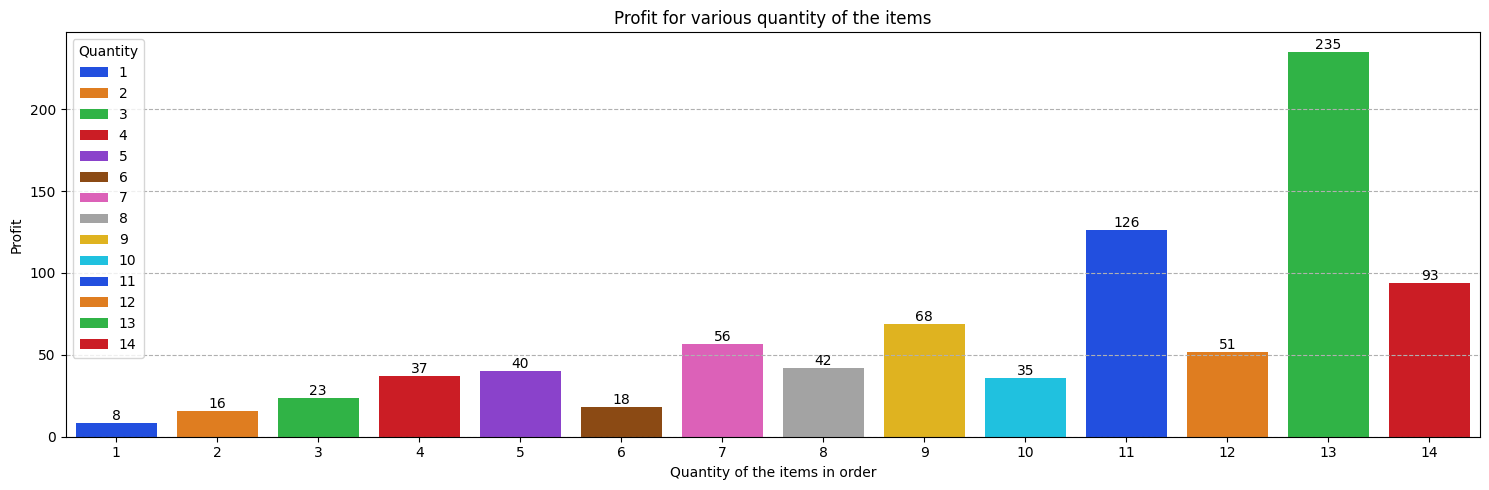

In [305]:
quantity_profit = store_df.groupby("Quantity")["Profit"].mean().reset_index()
plt.figure(figsize=(15, 5))
plt.title("Profit for various quantity of the items")
sns.barplot(quantity_profit, x = "Quantity",y = "Profit", hue='Quantity', palette="bright")

for index, value in enumerate(quantity_profit["Profit"]):
    plt.text(index, value , int(value), ha='center', va='bottom')
    
plt.xlabel("Quantity of the items in order")
plt.ylabel("Profit")

plt.grid(axis='y', linestyle='--', alpha=1)  
plt.tight_layout()
plt.show()

## Customer segment wise average profit

### for each customer segment, average profit has some difference but not very large as compared to the total range of the profit

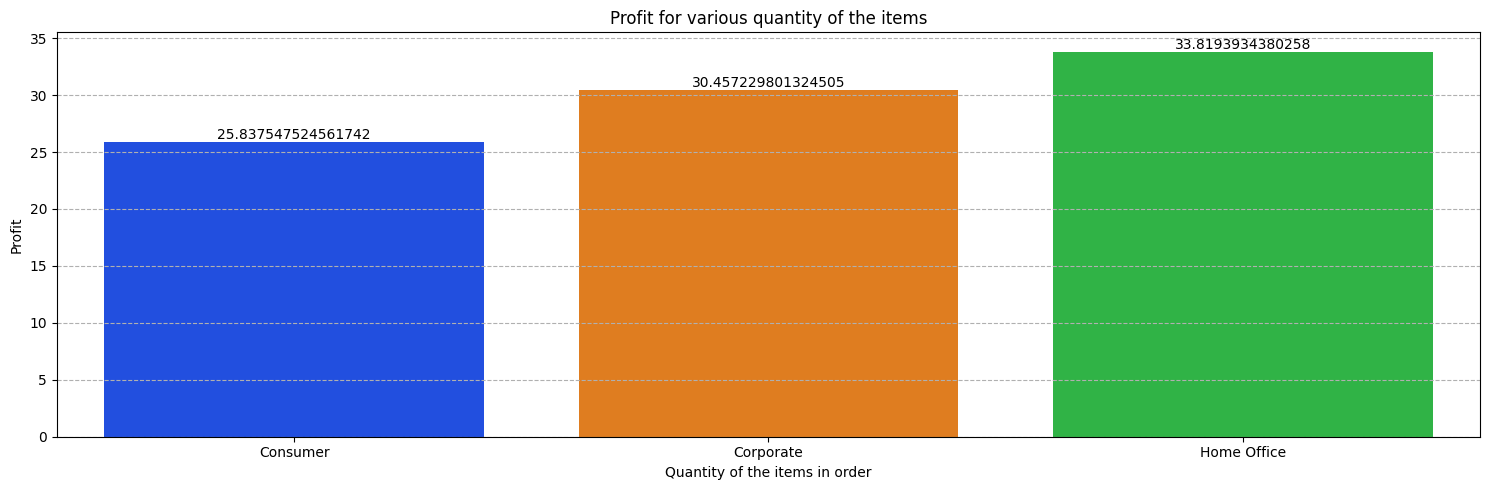

In [306]:
segment_profit = store_df.groupby("Segment")["Profit"].mean().reset_index()
plt.figure(figsize=(15, 5))
plt.title("Profit for various quantity of the items")
sns.barplot(segment_profit, x = "Segment",y = "Profit", hue='Segment', palette="bright")

for index, value in enumerate(segment_profit["Profit"]):
    plt.text(index, value , str(value), ha='center', va='bottom')
    
plt.xlabel("Quantity of the items in order")
plt.ylabel("Profit")

plt.grid(axis='y', linestyle='--', alpha=1)  
plt.tight_layout()
plt.show()

In [165]:
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row_ID         9994 non-null   int64         
 1   Order_ID       9994 non-null   object        
 2   Order_Date     9994 non-null   datetime64[ns]
 3   Ship_Date      9994 non-null   datetime64[ns]
 4   Ship_Mode      9994 non-null   object        
 5   Customer_ID    9994 non-null   object        
 6   Customer_Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal_Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product_ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub_Category   9994 n

# DATA PRE-PROCESSING

In [307]:
store_df.shape

(9994, 24)

### no missing values in any of the columns

In [308]:
store_df.isna().sum()   

Row_ID           0
Order_ID         0
Order_Date       0
Ship_Date        0
Ship_Mode        0
Customer_ID      0
Customer_Name    0
Segment          0
Country          0
City             0
State            0
Postal_Code      0
Region           0
Product_ID       0
Category         0
Sub_Category     0
Product_Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
ship_time        0
order_month      0
order_year       0
dtype: int64

In [309]:
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row_ID         9994 non-null   int64         
 1   Order_ID       9994 non-null   object        
 2   Order_Date     9994 non-null   datetime64[ns]
 3   Ship_Date      9994 non-null   datetime64[ns]
 4   Ship_Mode      9994 non-null   object        
 5   Customer_ID    9994 non-null   object        
 6   Customer_Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal_Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product_ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub_Category   9994 n

In [310]:
store_df.describe().T

,count,mean,min,25%,50%,75%,max,std
Row_ID,9994.0,4997.5,1.0,2499.25,4997.5,7495.75,9994.0,2885.163629
Order_Date,9994,2016-04-30 00:07:12.259355648,2014-01-03 00:00:00,2015-05-23 00:00:00,2016-06-26 00:00:00,2017-05-14 00:00:00,2017-12-30 00:00:00,NaN
Ship_Date,9994,2016-05-03 23:06:58.571142912,2014-01-07 00:00:00,2015-05-27 00:00:00,2016-06-29 00:00:00,2017-05-18 00:00:00,2018-01-05 00:00:00,NaN
Postal_Code,9994.0,55190.379428,1040.0,23223.0,56430.5,90008.0,99301.0,32063.69335
Sales,9994.0,229.858001,0.444,17.28,54.49,209.94,22638.48,623.245101
Quantity,9994.0,3.789574,1.0,2.0,3.0,5.0,14.0,2.22511
Discount,9994.0,0.156203,0.0,0.0,0.2,0.2,0.8,0.206452
Profit,9994.0,28.657547,-6599.978,1.72875,8.6665,29.364,8399.976,234.260028
ship_time,9994.0,3.958175,0.0,3.0,4.0,5.0,7.0,1.747567
order_year,9994.0,2015.722233,2014.0,2015.0,2016.0,2017.0,2017.0,1.123555


## Fetching numerical columns..

In [311]:
x = store_df.drop('Profit', axis=1)
x_numerical = x.select_dtypes(include=['int64','float64'])

x_numerical

,Row_ID,Postal_Code,Sales,Quantity,Discount,ship_time
0,1,42420,261.9600,2,0.00,3
1,2,42420,731.9400,3,0.00,3
2,3,90036,14.6200,2,0.00,4
3,4,33311,957.5775,5,0.45,7
4,5,33311,22.3680,2,0.20,7
...,...,...,...,...,...,...
9989,9990,33180,25.2480,3,0.20,2
9990,9991,92627,91.9600,2,0.00,5
9991,9992,92627,258.5760,2,0.20,5
9992,9993,92627,29.6000,4,0.00,5


##  checking for outliers

In [312]:
#  checking for outliers

Q1 = x_numerical.quantile(0.25)
Q3 = x_numerical.quantile(0.75)

IQR = Q3 - Q1

l_bound = Q1 - 1.5 * IQR
u_bound = Q1 + 1.5 * IQR

outlier_filter = ~((x_numerical < l_bound) | (x_numerical > u_bound)).any(axis=1)

store_df_filter = store_df[outlier_filter] # data after removing outliers

y_unfiltered = store_df['Profit']
y_filter = store_df_filter['Profit'] # taking y as a column to be predicted.
x_filter = store_df_filter.drop('Profit', axis=1) # will drop that column from x part to avoid miscalculations.


# parting filtered the columns to numericals and categorical
x_numerical_filter = x_filter.select_dtypes(include=['int64','float64'])
x_categorical_filter = store_df_filter.select_dtypes(include=['object'])


x_numerical_unfilter = x.select_dtypes(include=['int64','float64'])
x_categorical_unfilter = store_df.select_dtypes(include=['object'])

x.shape, x_numerical_filter.shape, x_categorical_filter.shape

((9994, 23), (6046, 6), (6046, 14))

In [318]:
x.shape, x_numerical_unfilter.shape, x_categorical_unfilter.shape

((9994, 23), (9994, 6), (9994, 14))

In [481]:
x_categorical_unfilter = x.select_dtypes(include=['object'])

x_categorical_unfilter_1 = x_categorical_unfilter.drop(['Product_Name', 'Order_ID', 'Customer_ID', 'Country', 'Customer_Name', 'Product_ID', 'City', 'Ship_Mode', 'Segment'], axis=1)
x_categorical_unfilter_1.shape

# x_categorical_unfilter_2 = x_categorical_unfilter.drop(['Product_Name', 'Order_ID', 'Customer_ID', 'Customer_Name', 'Product_ID', 'City', 'State'], axis=1)

(9994, 5)

In [486]:
x_categorical_filter = x_filter.select_dtypes(include=['object'])

x_categorical_filter_1 = x_categorical_filter.drop(['Product_Name', 'Order_ID', 'Customer_ID', 'Country', 'Customer_Name', 'Product_ID', 'City', 'Ship_Mode', 'Segment'], axis=1)
x_categorical_filter_1.shape

# x_categorical_filter_2 = x_categorical_filter.drop(['Product_Name', 'Order_ID', 'Customer_ID', 'Customer_Name', 'Product_ID', 'City', 'State'], axis=1)


(6046, 5)

## encoding filtered columns by OHE

In [487]:
x_categorical_1_fil_encoded = pd.get_dummies(x_categorical_filter_1, drop_first=False, dtype=int)

x_categorical_1_fil_encoded.shape

(6046, 83)

## encoding unfiltered columns by OHE

In [488]:
x_categorical_1_unfil_encoded = pd.get_dummies(x_categorical_unfilter_1, drop_first=False, dtype=int)

x_categorical_1_unfil_encoded.shape

(9994, 85)

##  re-scaling filtered numerical columns

In [489]:
store_scaler = MinMaxScaler()

x_numerical_filter_scaled = store_scaler.fit_transform(x_numerical_filter)

x_numerical_filter_scaled = pd.DataFrame(x_numerical_filter_scaled, columns=x_numerical_filter.columns, index = x_numerical_filter.index)

x_numerical_filter_scaled.shape

(6046, 6)

##  re-scaling unfiltered numerical columns

In [490]:
x_numerical_unfilter_scaled = store_scaler.fit_transform(x_numerical_unfilter)

x_numerical_unfilter_scaled = pd.DataFrame(x_numerical_unfilter_scaled, columns=x_numerical_unfilter.columns, index = x_numerical_unfilter.index)

x_numerical_unfilter_scaled.shape

(9994, 6)

## concating filtered dataframe

In [491]:
x_filtered = pd.concat([x_numerical_filter_scaled, x_categorical_1_fil_encoded], axis=1)

x_filtered.shape

(6046, 89)

## concating unfiltred ddataframe

In [492]:
x_unfiltered = pd.concat([x_numerical_unfilter_scaled, x_categorical_1_unfil_encoded], axis=1)

x_unfiltered.shape

(9994, 91)

In [493]:
print(x_filtered.isnull().sum())
print(x_unfiltered.isnull().sum())
print(y_filter.isnull().sum())
print(x_filtered.shape)
print(x_unfiltered.shape)
print(y_filter.shape)

Row_ID                   0
Postal_Code              0
Sales                    0
Quantity                 0
Discount                 0
                        ..
order_month_March        0
order_month_May          0
order_month_November     0
order_month_October      0
order_month_September    0
Length: 89, dtype: int64
Row_ID                   0
Postal_Code              0
Sales                    0
Quantity                 0
Discount                 0
                        ..
order_month_March        0
order_month_May          0
order_month_November     0
order_month_October      0
order_month_September    0
Length: 91, dtype: int64
Profit    0
dtype: int64
(6046, 89)
(9994, 91)
(6046, 1)


## splitting unfiltered data into train testt part..

In [494]:

x_unf_train, x_unf_test, y_unf_train, y_unf_test = train_test_split(x_unfiltered, y_unfiltered, test_size=0.2, random_state=42)

In [495]:
#  verification of the shape of parts

print(x_unf_train.shape)
print(x_unf_test.shape)
print(y_unf_train.shape) 
print(y_unf_test.shape)

(7995, 91)
(1999, 91)
(7995, 1)
(1999, 1)


## splitting filtered data into train testt part..

In [496]:

x_f_train, x_f_test, y_f_train, y_f_test = train_test_split(x_filtered, y_filter, test_size=0.2, random_state=42)

In [497]:
#  verification of the shape of parts

print(x_f_train.shape)
print(x_f_test.shape)
print(y_f_train.shape) 
print(y_f_test.shape)

(4836, 89)
(1210, 89)
(4836, 1)
(1210, 1)


## saving the files for splitted parts.

In [498]:
x_unfiltered.to_csv("unfiltered_store_prediction_features.csv", index=False)
y_unfiltered.to_csv("unfiltered_store_prediction_label.csv", index=False)

x_filtered.to_csv("filtered_store_prediction_features.csv", index=False)
y_filter.to_csv("filtered_store_prediction_label.csv", index=False)

## reading the files

In [499]:
x_unfiltered = pd.read_csv("unfiltered_store_prediction_features.csv")
y_unfiltered = pd.read_csv("unfiltered_store_prediction_label.csv")

x_filtered = pd.read_csv("filtered_store_prediction_features.csv")
y_filtered = pd.read_csv("filtered_store_prediction_label.csv")

In [500]:
print(x_unfiltered.shape)
print(y_unfiltered.shape)
print(x_filtered.shape)
print(y_filtered.shape)


(9994, 91)
(9994, 1)
(6046, 89)
(6046, 1)


# KNN Regression implementation for Unfiltered data. 
## (data without removing outliers..)

In [503]:
x_unf_train, x_unf_test, y_unf_train, y_unf_test = train_test_split(x_unfiltered, y_unfiltered, test_size=0.30, random_state=18)

print(x_unf_train.shape)
print(x_unf_test.shape)

print(y_unf_train.shape) 
print(y_unf_test.shape)

(6995, 91)
(2999, 91)
(6995, 1)
(2999, 1)


In [502]:
# instantiate the KNN regressor 
k=17
knn_reg = KNeighborsRegressor(n_neighbors=k)

In [457]:
# fitting the model into the KNN object. 

knn_reg.fit(x_unf_train, y_unf_train)

KNeighborsRegressor(n_neighbors=17)

In [458]:
#  making predictions about both train and test part.
y_train_pr = knn_reg.predict(x_unf_train)
y_test_pr = knn_reg.predict(x_unf_test)

In [462]:
# evaluation matrix calculations.
train_r_sq = (r2_score(y_unf_train, y_train_pr))
train_mae = np.mean(np.abs((y_unf_train - y_train_pr) / y_unf_train))
test_mae = np.mean(np.abs((y_unf_test - y_test_pr) / y_unf_test))


train_mape = np.mean(np.abs((y_unf_train - y_train_pr) / y_unf_train)) * 100
test_mape = np.mean(np.abs((y_unf_test - y_test_pr) / y_unf_test)) * 100


print("Train R Square:", train_r_sq)
print("Train MAPE:", train_mape)
print("Test MAPE:", test_mape)

print("Train MAPE:", train_mae)
print("Test MAPE:", test_mae)



Train R Square: 0.16518933693557802
Train MAPE: 648.0605676254706
Test MAPE: 574.9912867662624
Train MAPE: 6.480605676254706
Test MAPE: 5.7499128676626245


In [504]:
#  lets do for multiple k values

def do_knn(k):
    # instantiate the KNN regressor 
    knn_reg = KNeighborsRegressor(n_neighbors=k)

    # fitting the data set to the model
    knn_reg.fit(x_unf_train, y_unf_train)

    #  making predictions about both train and test part.
    y_unf_train_pr = knn_reg.predict(x_unf_train)
    y_unf_test_pr = knn_reg.predict(x_unf_test)

    # evaluation matrix calculations.
    unf_train_r_sq = (r2_score(y_unf_train, y_unf_train_pr))
    unf_train_mape = np.mean(np.abs((y_unf_train - y_unf_train_pr) / y_unf_train))

    # np.mean(np.abs((y_test - pred) / y_test))
    unf_test_mape = np.mean(np.abs((y_unf_test - y_unf_test_pr) / y_unf_test))

    return unf_train_r_sq, unf_train_mape, unf_test_mape


unf_evaluation = []
k_list = [3,5,7,9,11,13,15,17,19]

for k in k_list:
    unf_train_r_sq, unf_train_mape, unf_test_mape = do_knn(k)

    res = {}
    res['k'] = k
    res['train_r_sq'] = unf_train_r_sq
    res['train_mape'] = unf_train_mape
    res['test_mape'] = unf_test_mape

    unf_evaluation.append(res)

    
print(unf_evaluation)
    # print(k, train_r_sq, train_mape, test_mape)
unf_evaluated_frame = pd.DataFrame(unf_evaluation)

unf_evaluated_frame

        

[{'k': 3, 'train_r_sq': 0.4995925942222105, 'train_mape': 5.762046284772591, 'test_mape': 7.226307567112913}, {'k': 5, 'train_r_sq': 0.37988566968515347, 'train_mape': 6.688165059646798, 'test_mape': 6.7706871173369985}, {'k': 7, 'train_r_sq': 0.3312820117305888, 'train_mape': 6.6721749118370575, 'test_mape': 6.937522146143521}, {'k': 9, 'train_r_sq': 0.2976308266518094, 'train_mape': 6.753383132867161, 'test_mape': 6.782822489836896}, {'k': 11, 'train_r_sq': 0.2723308659767293, 'train_mape': 6.811723957513074, 'test_mape': 6.852151530414595}, {'k': 13, 'train_r_sq': 0.24652950826825348, 'train_mape': 6.984503892109338, 'test_mape': 6.922875337220236}, {'k': 15, 'train_r_sq': 0.23390485347542977, 'train_mape': 6.874738060154966, 'test_mape': 7.102773513322314}, {'k': 17, 'train_r_sq': 0.22112462294560709, 'train_mape': 6.836292941191531, 'test_mape': 6.921068775664264}, {'k': 19, 'train_r_sq': 0.20792613631056478, 'train_mape': 6.74059398268276, 'test_mape': 6.870354840415696}]


,k,train_r_sq,train_mape,test_mape
0,3,0.499593,5.762046,7.226308
1,5,0.379886,6.688165,6.770687
2,7,0.331282,6.672175,6.937522
3,9,0.297631,6.753383,6.782822
4,11,0.272331,6.811724,6.852152
5,13,0.246530,6.984504,6.922875
6,15,0.233905,6.874738,7.102774
7,17,0.221125,6.836293,6.921069
8,19,0.207926,6.740594,6.870355


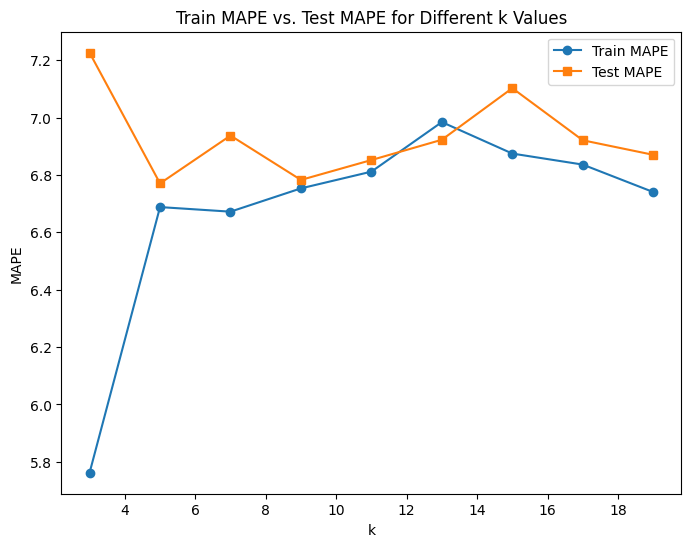

In [505]:
plt.figure(figsize=(8, 6))
plt.plot(unf_evaluated_frame['k'], unf_evaluated_frame['train_mape'], marker='o', label='Train MAPE')
plt.plot(unf_evaluated_frame['k'], unf_evaluated_frame['test_mape'], marker='s', label='Test MAPE')

# Add labels and title
plt.xlabel('k')
plt.ylabel('MAPE')
plt.title('Train MAPE vs. Test MAPE for Different k Values')
# plt.grid(True)
plt.legend()

# Show the plot
plt.show()

# KNN Regression implementation for filtered data. 
## (data with removing outliers..)

In [507]:
x_f_train, x_f_test, y_f_train, y_f_test = train_test_split(x_filtered, y_filtered, test_size=0.30, random_state=18)

print(x_f_train.shape)
print(x_f_test.shape)

print(y_f_train.shape) 
print(y_f_test.shape)

(4232, 89)
(1814, 89)
(4232, 1)
(1814, 1)


In [508]:
#  lets do for multiple k values

def do_knn(k):
    # instantiate the KNN regressor 
    knn_reg = KNeighborsRegressor(n_neighbors=k)

    # fitting the data set to the model
    knn_reg.fit(x_f_train, y_f_train)

    #  making predictions about both train and test part.
    y_f_train_pr = knn_reg.predict(x_f_train)
    y_f_test_pr = knn_reg.predict(x_f_test)

    # evaluation matrix calculations.
    f_train_r_sq = (r2_score(y_f_train, y_f_train_pr))
    f_train_mape = np.mean(np.abs((y_f_train - y_f_train_pr) / y_f_train)) * 100
    f_test_mape = np.mean(np.abs((y_f_test - y_f_test_pr) / y_f_test)) * 100

    return f_train_r_sq, f_train_mape, f_test_mape


f_evaluation = []
k_list = [3,5,7,9,11,13,15,17,19]

for k in k_list:
    f_train_r_sq, f_train_mape, f_test_mape = do_knn(k)

    res = {}
    res['k'] = k
    res['train_r_sq'] = f_train_r_sq
    res['train_mape'] = f_train_mape
    res['test_mape'] = f_test_mape

    f_evaluation.append(res)

    
print(f_evaluation)
    # print(k, train_r_sq, train_mape, test_mape)
f_evaluated_frame = pd.DataFrame(f_evaluation)

f_evaluated_frame

        

[{'k': 3, 'train_r_sq': 0.6813216361598853, 'train_mape': 191.16451036282004, 'test_mape': 223.8084170377286}, {'k': 5, 'train_r_sq': 0.5573351725202704, 'train_mape': 224.7062619968003, 'test_mape': 233.03482821495797}, {'k': 7, 'train_r_sq': 0.5153232647519912, 'train_mape': 227.01549087672691, 'test_mape': 232.38883396285388}, {'k': 9, 'train_r_sq': 0.4841323503609012, 'train_mape': 233.35346128048982, 'test_mape': 226.85939513719097}, {'k': 11, 'train_r_sq': 0.46168260463622035, 'train_mape': 229.97986876118813, 'test_mape': 225.48710792927596}, {'k': 13, 'train_r_sq': 0.4506452973933983, 'train_mape': 234.93606878887016, 'test_mape': 227.1896944794024}, {'k': 15, 'train_r_sq': 0.4411709678952611, 'train_mape': 240.26605402236316, 'test_mape': 229.30829386522697}, {'k': 17, 'train_r_sq': 0.4376533715267503, 'train_mape': 241.1908352893742, 'test_mape': 229.95312433717703}, {'k': 19, 'train_r_sq': 0.42939496144111544, 'train_mape': 247.15717860177818, 'test_mape': 229.31558497395264

,k,train_r_sq,train_mape,test_mape
0,3,0.681322,191.164510,223.808417
1,5,0.557335,224.706262,233.034828
2,7,0.515323,227.015491,232.388834
3,9,0.484132,233.353461,226.859395
4,11,0.461683,229.979869,225.487108
5,13,0.450645,234.936069,227.189694
6,15,0.441171,240.266054,229.308294
7,17,0.437653,241.190835,229.953124
8,19,0.429395,247.157179,229.315585


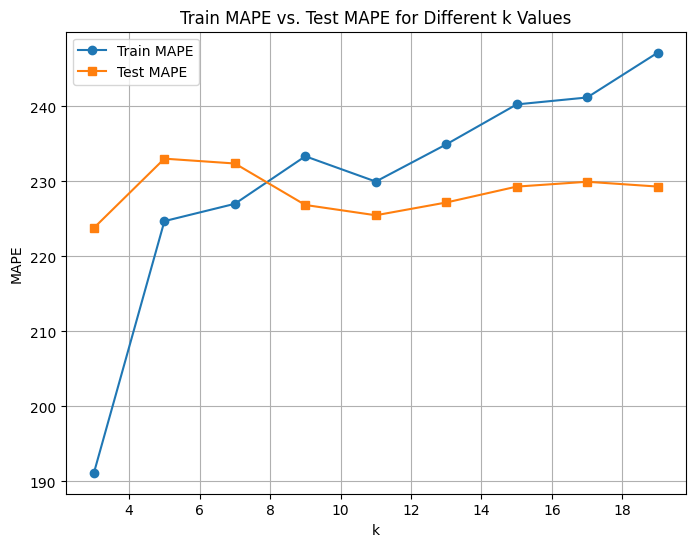

In [509]:
plt.figure(figsize=(8, 6))
plt.plot(f_evaluated_frame['k'], f_evaluated_frame['train_mape'], marker='o', label='Train MAPE')
plt.plot(f_evaluated_frame['k'], f_evaluated_frame['test_mape'], marker='s', label='Test MAPE')

# Add labels and title
plt.xlabel('k')
plt.ylabel('MAPE')
plt.title('Train MAPE vs. Test MAPE for Different k Values')
plt.grid(True)
plt.legend()

# Show the plot
plt.show()

# Outlier-detection conclusion
### from seeing the results dataframes for the filtered data and unfilteres data, We can say that in this case model is performing better when outliers are removed and some weakness is visible in the model in the presence of the outliers in the data.